[Download the slides from here.](https://www.dropbox.com/s/fvhuqm1nmxevg8o/B2-Inference.pdf?dl=0)

<img src="https://cdn.shopify.com/s/files/1/0070/7032/files/what-is-ab-testing.jpg?v=1556764132&width=1024" width=500>

Randomized Controlled Trials
---------

**Inference**

Last time, we looked at significance testing by retreating to the very first test. It was a biggie - a question of divine intervention. "Does God Exist?" It might seem antique, but there's something very simple to hold on to in this example -- it let us examine the basic testing framework. 

Let's now look at Hill's data. He was studying whether an antibiotic, Streptomycin, was better than bed rest for treating tuberculosis. Let's read in his data using `read.csv()` as we did last time for the COVID Tracking data. This time, I've created a data set and stored it on GitHub. 

In [1]:
hill <- read.csv("https://github.com/cocteau/breakfasts/raw/master/data/hill.csv")
head(hill)

outcome,treatment
survived,control
survived,control
survived,control
survived,control
survived,control
survived,control


The function `head()` gives you the first six rows of our data, while `tail()` gives you the last six. You can change how many you see by adding an "argument" to the call. 

In [4]:
tail(hill)

,outcome,treatment
102,survived,penicillin
103,survived,penicillin
104,died,penicillin
105,died,penicillin
106,died,penicillin
107,died,penicillin


In [5]:
tail(hill,3)

,outcome,treatment
105,died,penicillin
106,died,penicillin
107,died,penicillin


We can make the table we've been looking at in slides with a `table()` command.

In [6]:
table(hill)

          treatment
outcome    control penicillin
  died          14          4
  survived      38         51

Again, we see that 14/52 died on the control whereas only 5/55 died on penicillin. That seems pretty good, but could this be the result of randomness? That is, could we have seen these results simply by chance?

The chance mechanism at work here is **the randomization into penicillin or control**, something Hill advocated to prevent physician bias, and Fisher argued was the soul of the statistical enterprise. Randomization gives us a yardstick to measure the significance of an event against. 

Walking through our testing steps, we need a **null hypothesis** or "straw man". The one in play here is the assumption that both the control and penicillin are essential the same when it comes to treating TB. For example, the people who died on in the control group would have died if they received penicillin, and those who survived under penicillin would have also survived if they were simply given bedrest, the control.

>Under the null hypothesis, each person's outcome, whether they lived or died, would have been the same no matter whether they received penicillin or bed rest. That's our straw man, our devil's advocate. 

So reasoning under the null, everything in that table was the result of randomization. You can imagine that Hill had a total of 107 people, 18 of whom were destined to die no matter what treatment he gave them. By pure luck, fewer people who ultimately died of TB landed in the penicillin group. We could then take as **our test statistic** the number of people who died in the penicillin group and ask how often does randomization produce a table where 4 people or fewer die while receiving penicillin? 

*If that is a pretty common occurrence*, then we would say that the data don't seem inconsistent with the null and we would think about what happened and whether penicillin is as beneficial as we thought. *If it is an uncommon occurrence*, we could take it as evidence that our null hypothesis is wrong, that the two treatments are not the same. 

To create our null distribution, let's try rerandomizing people into penicillin or bed rest, since under the null hypothesis no matter what treatment we gave them they would have lived or died just as they did in Hill's study.

In the code below, we copy the data set `hill` and make a new, identical data frame (first cell). We then take the treatment column and replace it with a mixed up version of the original (second cell). That is, we put all the treatments in a hat (55 "control" and 57 "penicillin") and draw them out one at a time, assigning or reassigning them one-by-one to the patients. **Each of the 107 patients is re-randomized.** The defaults for `sample()` are to draw everything from the hat without replacement.

And because the null hypothesis assumes these two treatments performing identically, the patients would have lived or died exactly as they did in Hill's table. Hence we have repeated his experiment with a different randomization. **So, let's look at some of the experiments that Hill didn't run, but are equally legit under the null.**

Exercise the code below a few times. You only have to do the first cell once, and then just overwrite the treatment column over and over.

In [14]:
newhill <- hill

In [15]:
# do this a few times and watch the count of people in the "died"-"penicillin" cell

newhill$treatment <- sample(hill$treatment)
table(newhill)

          treatment
outcome    control penicillin
  died           9          9
  survived      43         46

What do you see? The table bounces around a bit. Let's start keeping track of how many people die on penicillin each time we do this. And make a histogram of the null distribution as before.

In [12]:
# create a "vector" called "newtrials" of length 10,000 to hold our test 
# statistics - we are re-randomizing 10,000 times

newtrials <- rep(0,10000)

# perform our re-randomization with the sample() command and count how many patients died
# on the Streptomycin

for(i in 1:10000){

    newhill$treatment <- sample(hill$treatment)
    newtrials[i] <- table(newhill)[1,2]
}

The only thing new here is the `[1,2]`. What that's doing is taking our table of experimental results and plucking out the element in the first row and second column. This is old-school subsetting of data. The element in the first row, second column is the count of people who died on Streptomycin, our test statistic.

R supports some amazingly beautiful graphics, but at this first step, we just want an image and so we are going to use one of the more crude graphical tools for making a histogram, `hist()`. Oh and what is a histogram?

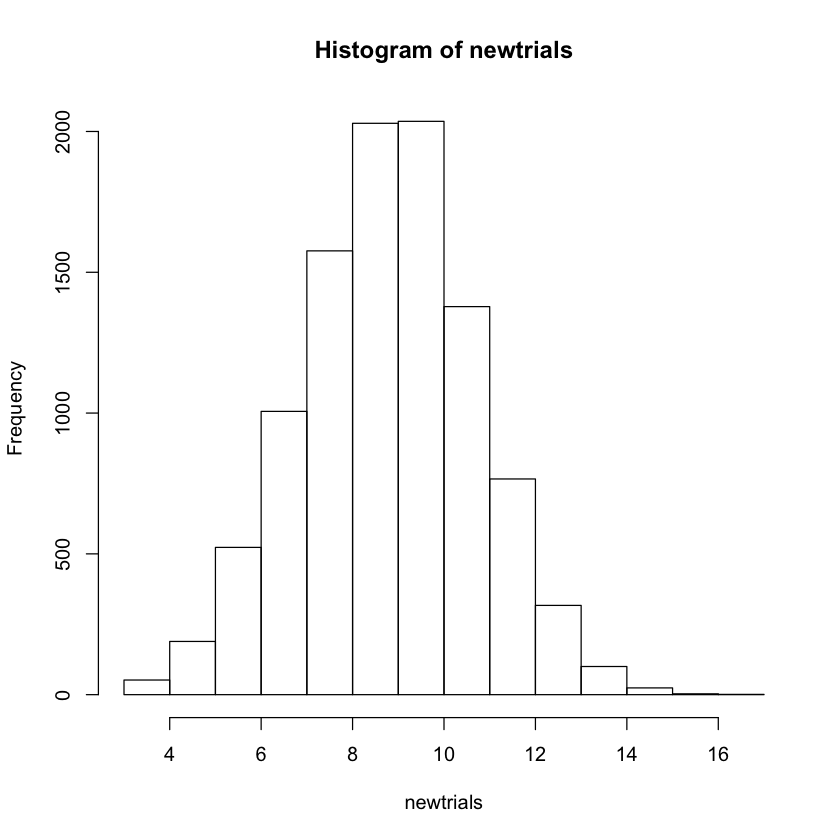

In [13]:
hist(newtrials)

What do you notice? How likely are we to see a 4 or fewer deaths from penicilin just by chance? That is, under the null hypothesis, how likely is a table that is as or more extreme in favor of penicillin than the one we saw?

R has a series of "logical operators" that let you make comparisons between data values. Here we can use `<=` "less than or equal to" to see which of our simulations in `newtrials` is less than or equal to four -- TRUE if so, FALSE if not. Here's the first 100 simulations.

In [17]:
head(newtrials<=4,100)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE

Now, what `newtrials <= 4` has done is made another vector, more data, this time each element corresponds to an entry in `newtrials` and is either TRUE or FALSE. If we `sum()` these values, TRUE becomes 1 and FALSE 0, so we can count how many trials had Steptomycin deaths of 4 or less. 

In [18]:
sum(newtrials<=4)

[1] 52

In my case 59 out of 10,000, or 0.0059, or about 0.6% had counts as low or lower than what Hill saw, for a P-value of 0.0059. What do you think? Does this provide evidence that our null hypothesis is wrong? What you immediately start to look for is some kind of color coding telling you when the strength of evidence is sufficient to "reject" the null hypothesis, something to be a warning that the hypothesis is in danger.

This is where our discussion about the problems with P-values comes into play. You don't take it seriously until the P-value is not microscopically small. Then the errors built into this need to be evaluated. For 60 or so times out of 10,000 **under the null hypothesis of no difference, you get a table, just by chance, that makes penicillin look really good.** If you reject the null hypothesis then you might be putting faith in penicillin when none is warranted. How small should a P-value be for you to feel comfortable that you're not making a mistake?

For academic publishing, a cutoff of 0.05 is typical. Any P-value below 0.05 is said to be "statistically significant." Significance means, typically, that a paper can get published, the researcher having found an "important" result. 

And that's part of the issue with significance testing. Fisher meant it to be something that one consulted for evidence, but you had a lifetime of experience as well to draw on. It's why he could make a cavalier comment about 0.05 being comfortable to him because it meant that with this as a cutoff, you'll only incorrectly rejecting a null hypothesis 1 in 20 times - an error rate he said he could live with. But again, he wasn't a stickler for these rules and actively fought against them.

There is also a real difference between statistical significance and practical significance. We'll see that more clearly when we cover confidence intervals.

The P-vaue has held sway in academic publishing for quite some time, but recently there has been a move to do something about it, to replace it with more meaningful measures. [Here is a nice Vox article](https://www.vox.com/science-and-health/2017/7/31/16021654/p-values-statistical-significance-redefine-0005) that summarizes the trouble with P-values. It's worth a read.

**A/B Testing**

The mechanism behind randomized trials is underneath a host of processes that are optimizing headlines, moving content around on home pages, and testing out what kind of content is pushed out to social media. [Have a read about what Buzzfeed does.](https://ijnet.org/en/blog/adaptation-ab-testing-and-analytics-how-buzzfeed-optimizes-news-its-audience) We are now going to load up the data given to us by the New York Times. [Pull it from Dropbox](https://www.dropbox.com/s/x8ud9taqg12s7c4/nyt.csv?dl=0) and place it in the same folder as your notebook. It's a little old now, but the principles are the same. 

The treatment, you will recall, was replacing a Tab layout versus a List layout for the top cities and most e-mailed stories. Again, this was an old version of the site. The treatment is stored in a variable called "Variation" (which page variation were people shown) and "IfClicked" (did they click or not). Read in the data and then have a look.

In [19]:
nyt = read.csv("nyt.csv")
head(nyt)

User_ID,UserVisit_ID,StartTime_SSE,StartTime_English,VisitLength,Variation,RefererUrl,EntryPageUrl,Pageviews,TotalVisits,TimeSinceFirstVisit,UserAgent,IfClicked
293076199,374522966,1227026424,"Tue, Nov 18, 2008 - 16:40:24 (GMT)",8,List,http://www.nytimes.com/pages/politics/index.html,http://travel.nytimes.com/pages/travel/index.html,1,2,59.00,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727),0
304430946,374523042,1227026429,"Tue, Nov 18, 2008 - 16:40:29 (GMT)",5,Tabs,http://www.nytimes.com/2008/11/19/business/19markets.html?_r=1&hp,http://travel.nytimes.com/pages/travel/index.html,1,1,40.99,Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.4) Gecko/2008102920 Firefox/3.0.4,0
299920750,374523050,1227026430,"Tue, Nov 18, 2008 - 16:40:30 (GMT)",178,Tabs,http://www.nytimes.com/,http://travel.nytimes.com/,4,2,48.23,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; msie6xpv1; MSIE6ENV21; .NET CLR 1.0.3705; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; MS-RTC LM 8; .NET CLR 3.0.04506.648; .NET CLR 3.5.21022),0
303737899,374523100,1227026433,"Tue, Nov 18, 2008 - 16:40:33 (GMT)",10,Tabs,http://www.nytimes.com/pages/business/smallbusiness/index.html,http://travel.nytimes.com/pages/travel/index.html,1,2,41.98,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; .NET CLR 3.0.04506.648; .NET CLR 3.5.21022; InfoPath.1),0
195103988,374523273,1227026446,"Tue, Nov 18, 2008 - 16:40:46 (GMT)",81,List,http://movies.nytimes.com/pages/movies/index.html,http://travel.nytimes.com/pages/travel/index.html,3,45,213.81,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30; InfoPath.1; .NET CLR 3.0.04506.648),0
281218142,374523374,1227026455,"Tue, Nov 18, 2008 - 16:40:55 (GMT)",336,Tabs,http://www.nytimes.com/,http://travel.nytimes.com/,13,2,77.27,Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727; .NET CLR 3.0.04506.30),0


The variables above include the following.

> User_ID - A unique number for each visitor
<br> UserVisit_ID - A unique number for each visit
<br> StartTime_SSE - UNIX time for the start of the visit
<br> StartTime_English - A more humanly readable version of the time
<br> VisitLength - The number of seconds the visitor was reading the Travel Section pages
<br> Variation - The version of the page they received
<br> RefererURL - The page they clicked on to get to the Travel Section (if any)
<br> EntryPageUrl - The first page on nytimes.com they visited
<br> Pageviews - The number of pages viewed in the Travel Section
<br> TotalVisits - The total number of visits to the site
<br> TimeSinceFirstVisit (days) - How long had it been since their first visit
<br> UserAgent - Their browser
<br> TotalClicks - How many times did they ckick on the "most popular" field
<br> IfClicked - 0/1 did they click on the "most popular" field at least once

This data set was collected in 2008 (sadly) and even then you get an idea for how much information sites have to help adapt content. A/B testing is just one strategy. There is plenty here to build up kind of profile of your viewing habits.

Here is how you make a table from just "Variation" and "IfClicked" -- we pull out the two columns we're after and provide them both to `table()` (as opposed to feeding it one data set with two columns as we did above). So, what does this say?

In [24]:
table(nyt$Variation,nyt$IfClicked)

      
           0     1
  List 65181   766
  Tabs 64836  1244

Following how we proceeded with Hill's data, we can make a copy of the data set and then shuffle the treatment column, under the null hypothesis that both Tabs and Lists encourage people to click on the "most popular" field equally. Let's have a look at a few simulated tables and get a sense of how likely, say, having 1244 people who saw Tabs click on the field. Is it rare, suggesting the null hypothesis is wrong; or is it consistent with the null distribution?

In [25]:
newnyt = nyt

In [26]:
# do this a few times and watch the count of people in the "died"-"penicillin" cell

newnyt$Variation <- sample(nyt$Variation)
table(newnyt$Variation,newnyt$IfClicked)

      
           0     1
  List 64940  1007
  Tabs 65077  1003

Because this data set is big (130k rows), we will only simulate 1000 times. The results are clear enough even with this smaller number. Notice also that our test statistic, clicking on Tabs, is the number in the second row and second column of the table. So we'll use `[2,2]` to pull it out.

In [28]:
newtrials <- rep(0,1000)

for(i in 1:1000){
    newnyt$Variation <- sample(nyt$Variation)
    newtrials[i] <- table(newnyt$Variation,newnyt$IfClicked)[2,2]
}

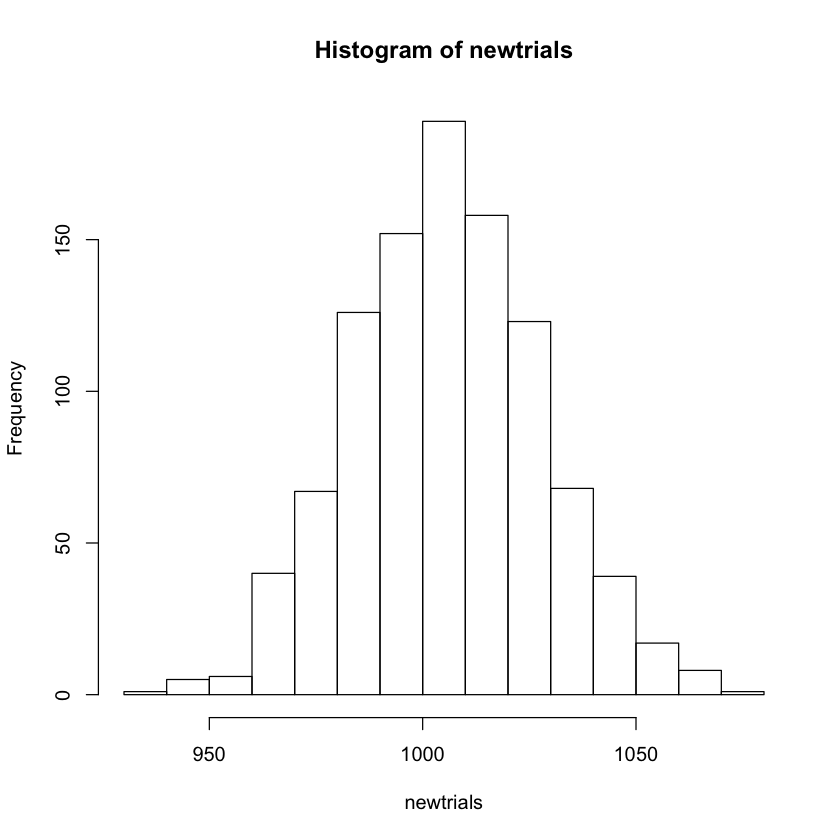

In [29]:
hist(newtrials)

What do you think?

So far we have played a little fast and loose with some of the technicalities and we can give you more resources on how testing works, but you get the spirit. In later incarnations, competing camps tried to firm up significance testing by casting it as a decision problem. Hypothesis testing was developed by Jerzy Neyman and Egon Pearson and involves not only a null hypothesis but also an alternative. 

Neyman and Pearson talk specifically about errors you can make in this testing process (rejecting a true null hypothesis or failing to reject a false null hypothesis, say). By accounting for these two errors (called Type I and Type II), they provided tools for researchers to balance the kinds of mistakes they might make. But there's no new magic here - in fact Neyman and Pearson decided that these rules were important because in their estimation, you really couldn't learn anything from data. You could only behave in ways that protected you from making mistakes. It was a kind of behavioral induction.

Next time, we will look at confidence intervals (margins of error), starting with [things like these](https://projects.fivethirtyeight.com/trump-approval-ratings/).